In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split


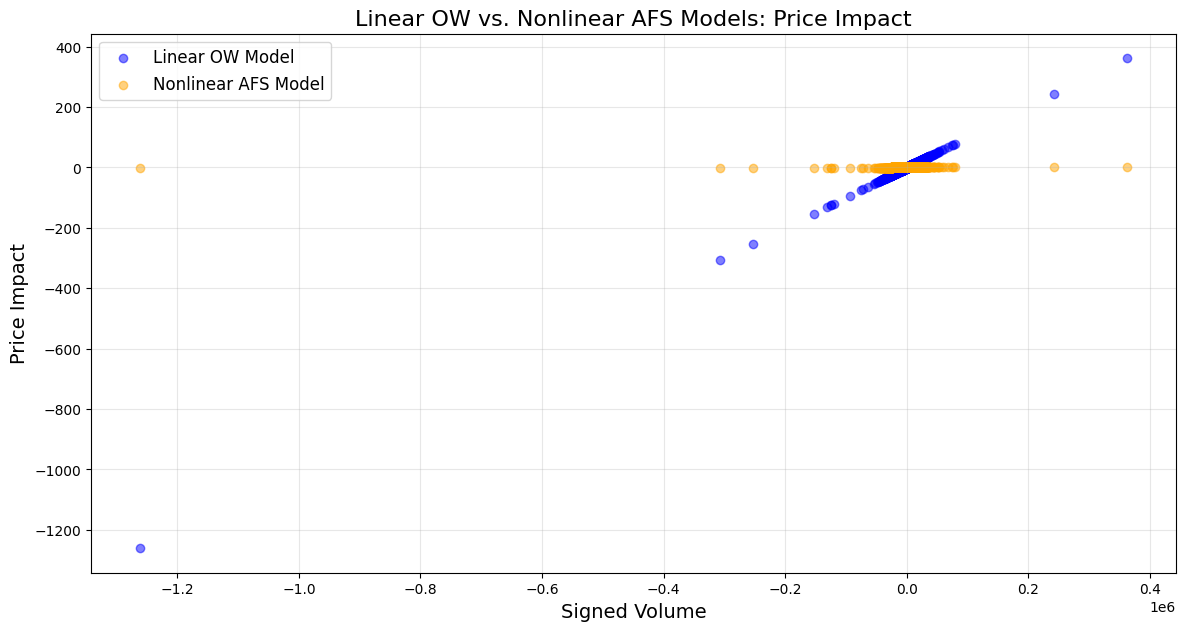

In [ ]:
##TASK 1
df = pd.read_csv('merged_data.csv')

df['linear_ow_impact'] = df['Signed Volume'] * 0.001
df['nonlinear_afs_impact'] = np.sign(df['Signed Volume']) * np.sqrt(np.abs(df['Signed Volume'])) * 0.001

plt.figure(figsize=(14, 7))
plt.scatter(df['Signed Volume'], df['linear_ow_impact'], alpha=0.5, label='Linear OW Model', color='blue')
plt.scatter(df['Signed Volume'], df['nonlinear_afs_impact'], alpha=0.5, label='Nonlinear AFS Model', color='orange')
plt.title('Linear OW vs. Nonlinear AFS Models: Price Impact', fontsize=16)
plt.xlabel('Signed Volume', fontsize=14)
plt.ylabel('Price Impact', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


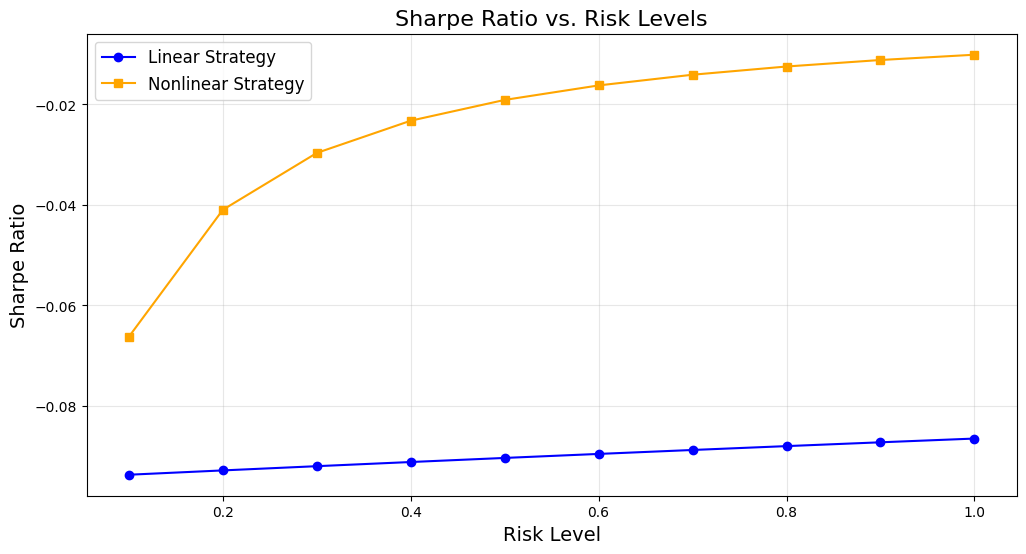

In [ ]:
##TASK 2

risk_levels = np.linspace(0.1, 1.0, 10)
linear_strategy_performance = []
nonlinear_strategy_performance = []

for risk in risk_levels:
    sharpe_linear = np.mean(df['linear_ow_impact']) / (risk + np.std(df['linear_ow_impact']))
    linear_strategy_performance.append(sharpe_linear)

    sharpe_nonlinear = np.mean(df['nonlinear_afs_impact']) / (risk + np.std(df['nonlinear_afs_impact']))
    nonlinear_strategy_performance.append(sharpe_nonlinear)

plt.figure(figsize=(12, 6))
plt.plot(risk_levels, linear_strategy_performance, label='Linear Strategy', marker='o', color='blue')
plt.plot(risk_levels, nonlinear_strategy_performance, label='Nonlinear Strategy', marker='s', color='orange')
plt.title('Sharpe Ratio vs. Risk Levels', fontsize=16)
plt.xlabel('Risk Level', fontsize=14)
plt.ylabel('Sharpe Ratio', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


693/693 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 610286.3125 - mae: 120.9420 - val_loss: 327410.8438 - val_mae: 251.1408
Epoch 2/50
693/693 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2003472.1250 - mae: 99.2938 - val_loss: 93182.3594 - val_mae: 102.4792
Epoch 3/50
693/693 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2854486.7500 - mae: 166.9820 - val_loss: 109671.9922 - val_mae: 100.8410
Epoch 4/50
693/693 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1177707.7500 - mae: 109.9994 - val_loss: 159581.7656 - val_mae: 130.0830
Epoch 5/50
693/693 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3556613.7500 - mae: 127.3202 - val_loss: 80317.8359 - val_mae: 65.5474
Epoch 6/50
693/693 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1057762.3750 - mae: 104.9380 - val_loss: 67801.5078 - val_mae: 58.9585
Epoch 7/50
693/693 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 761384.0000 - mae: 71.8492 - val_loss: 61995.2773 - val_mae: 41.3882
Epoch 8/50
693/693 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 521823.1250 - mae: 61.6923 - va

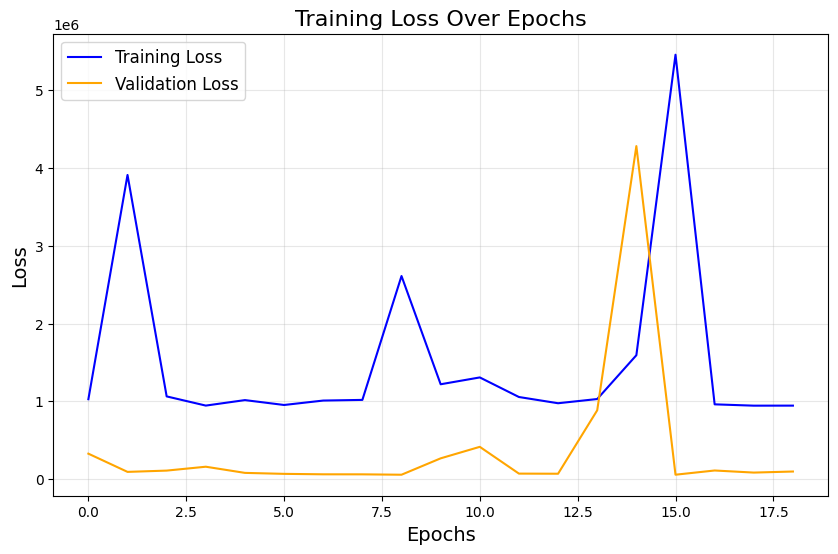

In [ ]:
##TASK 3
X = df[['Signed Volume', 'best_bid', 'best_ask']].values
df['price_impact'] = df['Signed Volume'] * (df['price'] - df['mid_price'])
y = df['price_impact'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32,
                    callbacks=[early_stopping], verbose=1)

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training Loss Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()
